In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
tf.__version__

'2.3.0'

### 1)Linear Classifier for CIFAR10

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('y_test: ',y_test.shape)
print('y_test[0]',y_test[0])

K = len(np.unique(y_train)) # Number of Classes
print('Number of classes: ',K)

x_train:  (50000, 32, 32, 3)
y_test:  (10000, 1)
y_test[0] [3]
Number of classes:  10


In [4]:
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10, 32x32x3=3072
# Din = 784 # MINIST

# Normalize pixel values: numpy works in one datatype(weights,features):float, faster training,
x_train, x_test = x_train / 255.0, x_test / 255.0


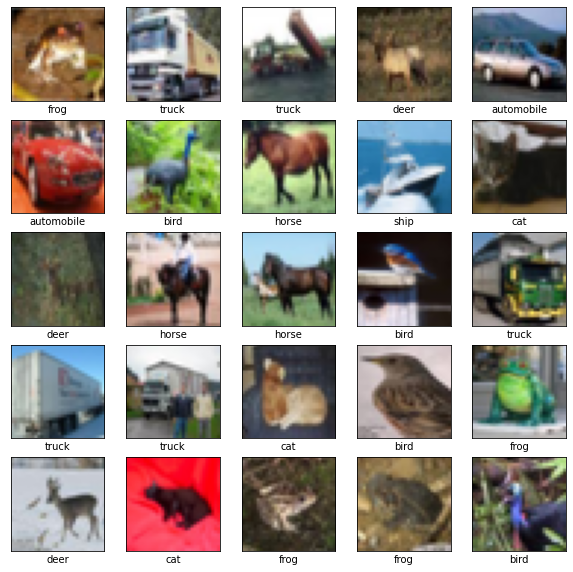

In [5]:
#verify data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
#centering the data and making range similar in order to get stable gradients
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#re-classify the y(label) sets as categorical: onehot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#resize x set into a collection of rows, each row is an image
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

y_train: (50000, 10)
y_test: (10000, 10)
x_train: (50000, 3072)
x_test: (10000, 3072)


In [7]:
#initialize the Weight matrix and bias 
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

w1: (3072, 10)
b1: (10,)


In [8]:
#parameters
batch_size = Ntr    #set batchsize to entire trainingset size
iterations = 300
lr = 0.015         #learning rate
lr_decay= 0.9999   #learning rate decay
reg = 1e-7         #regularization parameter
loss_history = []
train_acc_history = []
val_acc_history = []

#fix seed for random number generator
seed = 0
rng = np.random.default_rng(seed=seed)

In [23]:
def accuracy(y_pred,y):
    predclass = np.argmax(y_pred,axis=1)
    realclass = np.argmax(y,axis=1)
    return ( np.sum(predclass==realclass)/realclass.size )

In [25]:
def runlinearmodel(batchsize=batch_size,iterations=iterations,lr=lr,lr_decay=lr_decay,reg=reg):
    t0 = time.time()
    std=1e-5
    w1 = std*np.random.randn(Din, K)
    b1 = np.zeros(K)

    loss_history = []
    train_acc_history = []
    val_acc_history = []
    seed = 0
    rng = np.random.default_rng(seed=seed)

    for t in range(iterations+1):
        batch_indices = np.random.choice(Ntr,batch_size)
        rng.shuffle(batch_indices)
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        # Forward pass
        y_pred = x.dot(w1) + b1
        loss = (1./batch_size)* np.square(y_pred-y).sum()  + reg*(np.sum(w1*w1)) #mean square loss
        loss_history.append(loss)
        acc= accuracy(y_pred,y)
        train_acc_history.append(acc)

        if t%10 == 0:
            print('epoch %d/%d: MSloss= %f , train accracy= %f' % (t,iterations,loss,acc))
        
        dy_pred = (1./batch_size)*2.0*(y_pred-y)
        dw1 = x.T.dot(dy_pred) + reg*w1
        db1 = dy_pred.sum(axis=0)

        # Backward pass
        w1 -= lr*dw1
        b1 -= lr*db1
        lr *= lr_decay

    t1 = time.time()
    print('time taken = ',(t1-t0))

    return w1,loss_history,train_acc_history


In [26]:

w1,loss_history,train_acc_history = runlinearmodel()

epoch 0/300: MSloss= 0.999977 , accracy= 0.108800
epoch 10/300: MSloss= 0.873554 , accracy= 0.355420
epoch 20/300: MSloss= 0.839481 , accracy= 0.371540
epoch 30/300: MSloss= 0.819967 , accracy= 0.383580
epoch 40/300: MSloss= 0.809030 , accracy= 0.393060
epoch 50/300: MSloss= 0.803724 , accracy= 0.392980
epoch 60/300: MSloss= 0.799101 , accracy= 0.397980
epoch 70/300: MSloss= 0.795602 , accracy= 0.402420
epoch 80/300: MSloss= 0.795115 , accracy= 0.400420
epoch 90/300: MSloss= 0.791983 , accracy= 0.409020
epoch 100/300: MSloss= 0.791209 , accracy= 0.406820
epoch 110/300: MSloss= 0.791836 , accracy= 0.405540
epoch 120/300: MSloss= 0.788573 , accracy= 0.411400
epoch 130/300: MSloss= 0.788987 , accracy= 0.408580
epoch 140/300: MSloss= 0.788891 , accracy= 0.407740
epoch 150/300: MSloss= 0.785617 , accracy= 0.415600
epoch 160/300: MSloss= 0.786669 , accracy= 0.413020
epoch 170/300: MSloss= 0.784880 , accracy= 0.418180
epoch 180/300: MSloss= 0.784798 , accracy= 0.417520
epoch 190/300: MSloss= 

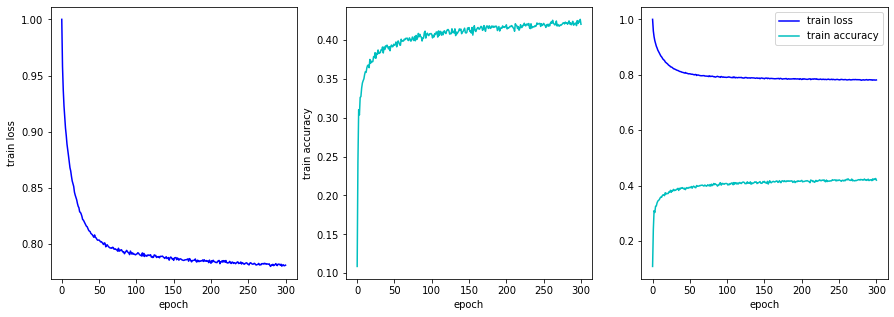

In [36]:
#display Train loss,train accuracy
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(loss_history,'b')
ax[0].set_xlabel('epoch') 
ax[0].set_ylabel('train loss') 

ax[1].plot(train_acc_history,'c')
ax[1].set_xlabel('epoch') 
ax[1].set_ylabel('train accuracy')

ax[2].plot(loss_history,'b')
ax[2].plot(train_acc_history,'c')
ax[2].set_xlabel('epoch') 
ax[2].legend(['train loss','train accuracy']);

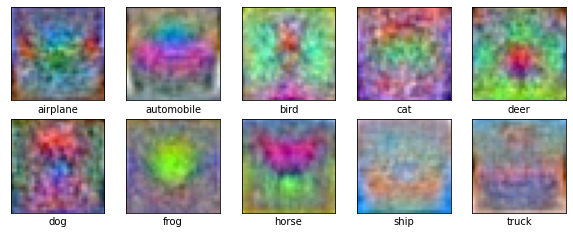

In [11]:
 # W is effectively 10 separate linear classifiers: one classifier per column of W 
 # Displaying w as images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    w = w1[:,i]
    wnorm = (w-min(w))/max(w) #+ mean_image.reshape(3072)
    wnorm = wnorm/max(wnorm)
    plt.imshow(wnorm.reshape((32,32,3)), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays need the extra index
    plt.xlabel(class_names[i])
plt.show()


In [12]:
print(w1.shape)
w1_test = w1[:,1]
print(w1_test.shape)
print(w1_test[:20])

(3072, 10)
(3072,)
[-1.16249741e-03 -2.08478442e-03 -2.04942980e-03  4.21565481e-05
 -9.66757263e-04 -1.05219600e-03  7.08327778e-04 -2.92102568e-04
 -3.30583486e-04  4.25762698e-05 -1.21119226e-03 -1.15348421e-03
  5.86346464e-04 -5.67763947e-04 -9.14607936e-04 -2.91489730e-04
 -1.02165958e-03 -1.66628061e-03  2.37708335e-04 -9.48098515e-04]


[0.45607252 0.40977148 0.41154637 0.51654907 0.46589915 0.46160992
 0.54999248 0.49976845 0.49783661 0.51657014 0.45362792 0.45652501
 0.54386872 0.48592958 0.46851717 0.49979922 0.46314292 0.43078138
 0.52636624 0.46683587]


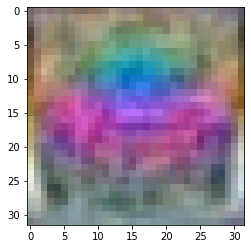

In [13]:
w1norm = (w1_test-min(w1_test))/max(w1_test)
w1norm = w1norm/max(w1norm)
print(w1norm[:20])
plt.figure(figsize=(4,4))
plt.imshow(w1norm.reshape((32,32,3)) )
plt.show()

In [20]:
#Displaying Accuracies

